In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

/home/hb/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [3]:
import cv2
import numpy as np

img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
corners = cv2.goodFeaturesToTrack(gray, 25, 0.01, 10)

# Convert corners to integer coordinates
corners = np.int0(corners)

# Draw circles around detected corners
for i in corners:
    x, y = i.ravel()
    cv2.circle(img, (x, y), 3, 255, -1)

# Display the result
cv2.imshow('Detected Corners', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


/tmp/ipykernel_125186/2113134470.py:9: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


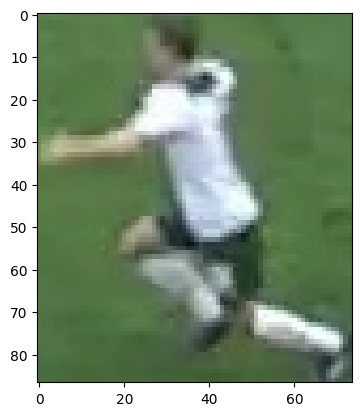

In [4]:
plt.imshow(image)
plt.show()

Take top half of image. since we want to classify players based on their t-shirt color. so we take top half of image


In [16]:
image.shape

(87, 74, 3)

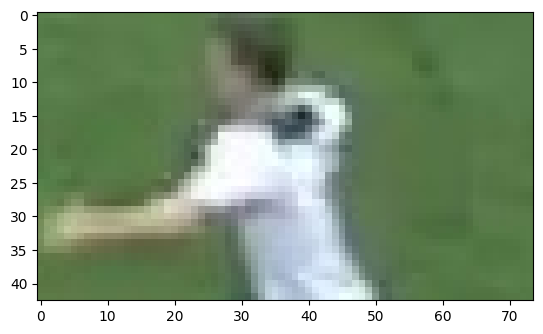

In [5]:
top_half_image=  image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

Change image into two cluster, player and externeal surface

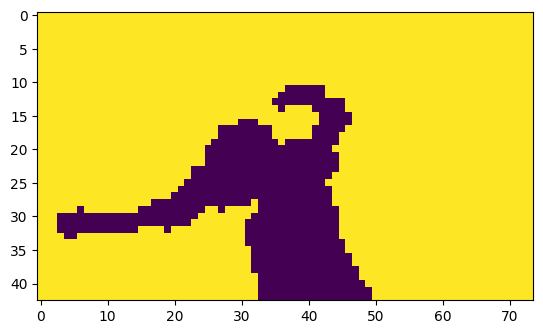

In [6]:
# Reshape the image into 2d array
image_2d = top_half_image.reshape(-1, 3)

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the orginal image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [14]:
print(labels.shape)  # for each pixel label is 1 or zero depending on which class it belongs
print(clustered_image.shape)

(3182,)
(43, 74)


In [15]:
43*74

3182

In cases when we use bounding boxes. the bonding box will include only single player. and in corners of the bounding box it will be mostly non player surface. so we consider majority from all corners from the bounding boxes as external pixel.

In [7]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [8]:
player_cluster = 1-non_player_cluster
print(player_cluster)

0


In [9]:
kmeans.cluster_centers_[player_cluster]

array([198.69479354, 209.005386  , 211.68222621])